# Import Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Import label encoder
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, RepeatVector, TimeDistributed

from keras.layers import Layer
from keras import backend as K
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

Import Dataset

In [8]:
df = pd.read_csv('data/cleaned_data1.csv')

In [9]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(529, 37)

In [11]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=5, n_components=10, 
                eigen_solver='auto')
X = isomap.fit_transform(X)

C:\Users\pavithra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'ISOMAP2')

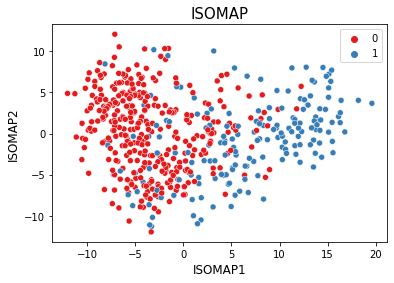

In [12]:
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='Set1')
plt.title("ISOMAP", fontsize=15)
plt.xlabel("ISOMAP1", fontsize=12)
plt.ylabel("ISOMAP2", fontsize=12)

In [13]:
#split dataset into train and test data
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [14]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [15]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(RBFLayer(10, 0.3))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_features,train_target,validation_data=(test_features,test_target),epochs=100,batch_size=32)

Epoch 1/100
12/12 [==============================] - 0s 17ms/step - loss: 0.6922 - accuracy: 0.6610 - val_loss: 0.6913 - val_accuracy: 0.6571
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.6836 - val_loss: 0.6896 - val_accuracy: 0.6571
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6836 - val_loss: 0.6879 - val_accuracy: 0.6571
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.6836 - val_loss: 0.6859 - val_accuracy: 0.6571
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6836 - val_loss: 0.6836 - val_accuracy: 0.6571
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6836 - val_loss: 0.6811 - val_accuracy: 0.6571
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.6836 - val_loss: 0.6772 - val_accuracy: 0.6571
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.6836 - val_loss: 0.4603 - val_accuracy: 0.6571
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.6836 - val_loss: 0.4541 - val_accuracy: 0.6571
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.6836 - val_loss: 0.4496 - val_accuracy: 0.6571
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.6836 - val_loss: 0.4454 - val_accuracy: 0.6571
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3914 - accuracy: 0.6836 - val_loss: 0.4409 - val_accuracy: 0.6571
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.6836 - val_loss: 0.4377 - val_accuracy: 0.6571
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.6836 - val_loss: 0.4379 - val_accuracy: 0.6571
Epoch 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
rbf_layer (RBFLayer)         (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


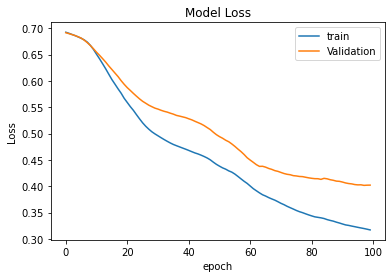

In [18]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

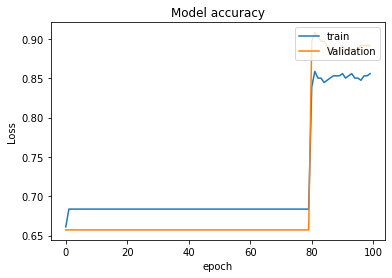

In [19]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

In [14]:
loss, acc = model.evaluate(test_features, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 84.000


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[92, 23],
       [ 5, 55]], dtype=int64)

In [16]:
print('Radial Basis Function Network: \n', classification_report(test_target, data),'\n')

Radial Basis Function Network: 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       115
           1       0.71      0.92      0.80        60

    accuracy                           0.84       175
   macro avg       0.83      0.86      0.83       175
weighted avg       0.87      0.84      0.84       175
 



In [17]:
#Validation

from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
RMSE_test = sqrt(mean_squared_error(test_target, prediction)) 

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(train_features)
#calculate RMSE
RMSE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning RMSE: %.4f'%RMSE_train)
print('\n')
print('Testing RMSE: %.4f'%RMSE_test)

Traning RMSE: 0.3533


Testing RMSE: 0.3652


In [18]:
#Validation

from sklearn.metrics import mean_absolute_error
from math import sqrt

#calculate RMSE
MAE_test = mean_absolute_error(test_target, prediction)

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(train_features)
#calculate RMSE
MAE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning MAE: %.4f'%MAE_train)
print('\n')
print('Testing MAE: %.4f'%MAE_test)

Traning MAE: 0.3533


Testing MAE: 0.2694
